In [62]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
import random
import os
from collections import Counter
import collections
import string
import time
import warnings
warnings.filterwarnings("ignore")

Load data

In [63]:
path = os.getcwd() + '/parsed_portals/all_portals_from_1.csv'

In [64]:
data = pd.read_csv(path, sep=';',encoding='latin-1', error_bad_lines=False, usecols=[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24])

In [147]:
data.columns

Index(['line', 'id', 'sub', 'firsttime', 'lasttime', 'scanner', 'virusname',
       'url', 'recent', 'response', 'ip', 'as', 'review', 'domain', 'country',
       'source', 'email', 'inetnum', 'netname', 'ddescr', 'ns1', 'ns2', 'ns3',
       'ns4', 'ns5'],
      dtype='object')

Preproccess data


In [140]:
# clean data (NaN entries)
data.dropna(subset=['country'], inplace=True)
data.dropna(subset=['firsttime'], inplace=True)
data.dropna(subset=['lasttime'], inplace=True)

# define subset to increase performance
data_subset = data[['line','firsttime','lasttime','recent','response', 'country']]

# set datatime type for firsttime/lasttime
data_subset['firsttime'] = pd.to_datetime(data_subset['firsttime'],format="%d-%m-%y %H:%M")
data_subset['lasttime'] = pd.to_datetime(data_subset['lasttime'],format="%d-%m-%y %H:%M")


In [146]:
print(data.shape)
print(data_subset.shape)


(998384, 25)
(998384, 7)


In [148]:
# split data in alive / dead
data_subset_alive = data_subset.loc[data_subset['response'] == 'alive']
data_subset_dead = data_subset.loc[data_subset['response'] == 'dead']

In [152]:
# add 'livetime' columndata
data_subset_dead['livetime'] = data_subset.apply(lambda row: row.lasttime - row.firsttime, axis=1)


In [153]:
means = data_subset_dead.groupby('country')['livetime'].mean(numeric_only=False)

In [154]:
means

country
AD           85 days 02:30:36
AE    60 days 21:36:32.584019
AF            1 days 19:02:30
AG          264 days 08:16:20
AL   107 days 20:28:36.716417
AM    75 days 17:48:45.503355
AO          113 days 22:38:00
AQ    25 days 03:26:35.132440
AR    90 days 11:29:40.904427
AT    72 days 10:19:13.790931
AU    80 days 05:39:27.810545
AW            6 days 02:55:00
AX           57 days 11:19:30
AZ    64 days 12:52:31.764705
BA   110 days 11:33:24.722222
BB          177 days 12:15:00
BD    66 days 00:50:43.402298
BE    86 days 22:08:38.289473
BF   121 days 18:46:21.290322
BG    95 days 03:40:06.806378
BH           55 days 04:24:20
BI    26 days 17:16:14.117647
BM           39 days 01:34:00
BN          126 days 13:53:32
BO    76 days 15:49:54.069767
BR    86 days 19:15:13.794521
BS   218 days 23:59:39.230769
BT     9 days 21:35:20.281690
BW   104 days 05:40:54.545454
BY   117 days 03:23:51.332453
               ...           
fi            3 days 06:04:00
fr    92 days 15:54:29.044585
gb

In [156]:
counter = Counter(data_subset_dead['country'])

print(counter)


Counter({'US': 315964, 'PA': 88223, 'DE': 74863, 'RU': 54605, 'NL': 41855, 'UA': 36899, 'GB': 36555, 'FR': 22212, 'CA': 21441, 'CN': 19857, 'BR': 16537, 'IT': 14754, 'TR': 13767, 'HK': 12696, 'AU': 10071, 'ID': 10065, 'PL': 9242, 'AE': 8986, 'ES': 8042, 'IL': 7797, 'VG': 7793, 'IN': 7683, 'MX': 6800, 'DK': 6613, 'MY': 6427, 'JP': 6275, 'TH': 6207, 'CZ': 6011, 'HU': 5770, 'AR': 5263, 'VN': 4892, 'EU': 4623, 'SE': 4468, 'MA': 4095, 'SG': 4086, 'CL': 3991, 'PT': 3896, 'ZA': 3829, 'VE': 3319, 'RO': 3300, 'AQ': 3209, 'CH': 2896, 'KZ': 2722, 'NO': 2629, 'ro': 2227, 'BG': 2195, 'KR': 2141, 'vn': 1903, 'SI': 1765, 'MK': 1704, 'FI': 1643, 'HR': 1629, 'MD': 1625, 'NZ': 1624, 'AT': 1588, 'IE': 1579, 'IR': 1568, 'BE': 1520, 'BY': 1516, 'SA': 1438, 'GR': 1345, 'TW': 1335, 'BD': 1305, 'LT': 1290, 'RS': 1274, 'SK': 1165, 'CY': 906, 'EE': 624, 'LV': 595, 'IS': 554, 'TN': 525, 'GE': 503, 'PK': 498, 'CO': 472, 'CS': 471, 'de': 449, 'LU': 321, 'PH': 280, 'LK': 277, 'EG': 272, 'it': 263, 'kr': 255, 'NP': 

In [116]:
counter = Counter(data_subset['country'])
countries = counter.keys()
c_counts = counter.values()

In [117]:
counter


Counter({'AT': 1618,
         'CA': 21554,
         'BR': 16604,
         'US': 319680,
         'NO': 2649,
         'PT': 3917,
         'HU': 5852,
         'GB': 36756,
         'JP': 6375,
         'FR': 22422,
         'PL': 9388,
         'be': 4,
         'CY': 910,
         'CZ': 6119,
         'NL': 42102,
         'VE': 3322,
         'DE': 75483,
         'IN': 7693,
         'IE': 1594,
         'HR': 1631,
         'AU': 10129,
         'AE': 9031,
         'BE': 1538,
         'LV': 599,
         'CH': 2981,
         'KR': 2190,
         'SK': 1184,
         'DK': 6637,
         'RO': 3339,
         'RU': 55374,
         'ES': 8156,
         'de': 453,
         'SE': 4574,
         'MX': 6829,
         'VG': 7799,
         'kr': 255,
         'MD': 1626,
         'IT': 15098,
         'TR': 13857,
         'TW': 1388,
         'CN': 19998,
         'CL': 4006,
         'BY': 1570,
         'EU': 4755,
         'BG': 2224,
         'MC': 15,
         'TH': 6258,
         

In [30]:
top_countries = pd.DataFrame()

top_countries['country'] = counter.keys()
top_countries['counts'] = counter.values()

top_countries = top_countries.sort_values(by ='counts' , ascending=False)
top_20_countries = top_countries[0:20]

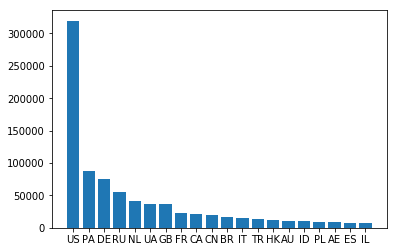

In [31]:
ind = np.arange(len(top_20_countries))
plt.bar(ind, top_20_countries['counts'])
plt.xticks(ind , top_20_countries['country'])
plt.show()

In [38]:
counter = Counter(data['virusname'])
urls = counter.keys()
c_counts = counter.values()

In [45]:
top_virus = pd.DataFrame()

top_virus['virus'] = counter.keys()
top_virus['counts'] = counter.values()

top_virus = top_virus.sort_values(by ='counts' , ascending=False)
top_5_virus = top_virus[0:5]

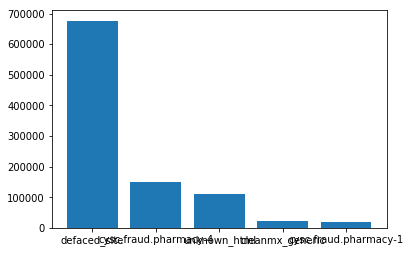

In [46]:
ind = np.arange(len(top_20_virus))
plt.bar(ind, top_5_virus['counts'])
plt.xticks(ind , top_5_virus['virus'])
plt.show()